### **Package installations**

In [451]:
###########Download necessary libraries###########
import math
import warnings

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection

# from causalml.inference.meta import LRSRegressor, XGBTRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor, BaseSRegressor
# from causalml.propensity import ElasticNetPropensityModel
# from causalml.inference.tf import DragonNet
# from causalml.metrics import get_cumgain, plot_gain, *
from sklearn.cluster import KMeans
from sklearn.metrics import (
    precision_score,
)
from sklearn.preprocessing import (
    StandardScaler,
)

warnings.filterwarnings("ignore")


In [452]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Artur\OneDrive\Documentos\GitHub\Superstore-Marketing-Campaign\superstore_data.csv")
number_of_rows = len(data)
# Display basic information
print (number_of_rows)
print(data.info())
print(data.describe())

2240
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-nul

In [453]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


#### **Data exploration**

In [454]:
##########Desciptive statistics##################
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [455]:
###########Check data dictionary###########
data_description = pd.read_excel("datadictionary.xlsx").dropna()

data_description.style.set_properties(subset=["Description"], **{"width":"200px"})

,Column Name,Data Type,Description
0,ID,int64,Unique ID of each customer
1,Year_Birth,int64,Age of the customer
2,Complain,int64,1 if the customer complained in the last 2 years
3,Dt_Customer,object,Date of customer's enrollment with the company
4,Education,object,Customer's level of education
5,Marital_Status,object,Customer's marital status
6,Kidhome,int64,Number of small children in customer's household
7,Teenhome,int64,Number of teenagers in customer's household
8,Income,float64,Customer's yearly household income
9,MntFishProducts,int64,The amount spent on fish products in the last 2 years


#### **Dealing with missing values**

In [456]:
###########Null values handling and analysis###########
# Function to calculate missing values by column for a dataframe
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: "Missing Values", 1: "% of Total Values"}
    )
    mis_val_table_ren_columns = (
        mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print(
        "There are "
        + str(mis_val_table_ren_columns.shape[0])
        + " columns that have missing values."
    )

    return mis_val_table_ren_columns


In [457]:
# Missing values statistics
miss_values = missing_values(data)

miss_values.head(20)

Dataframe has 22 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Income,24,1.1


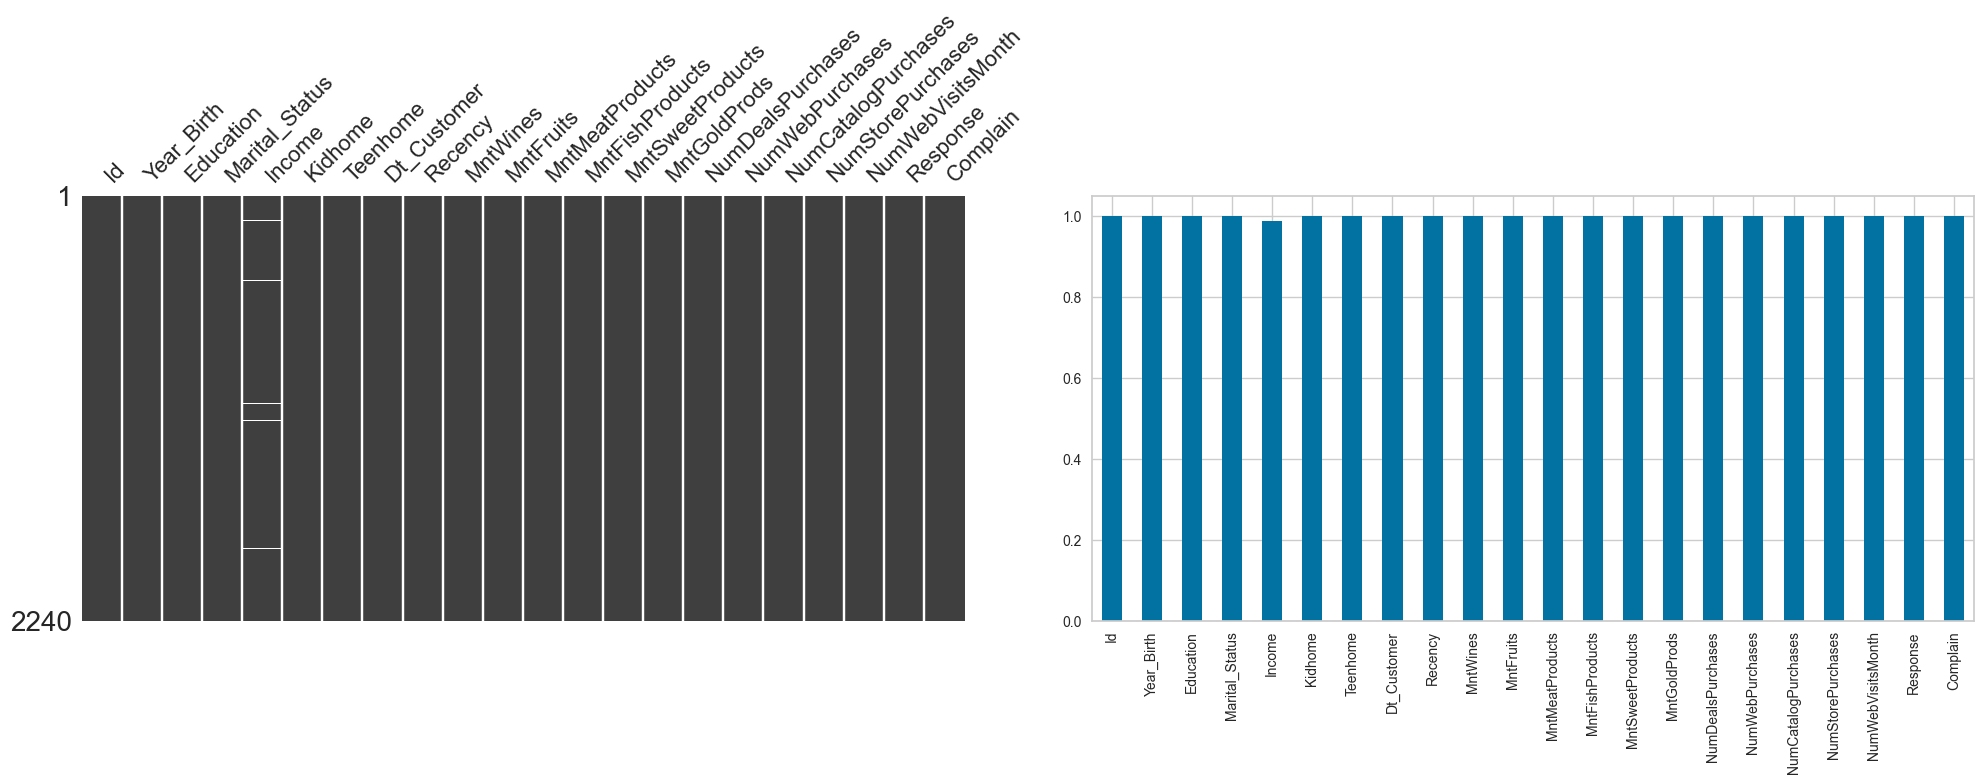

In [458]:
#######Visualizing missing values#########
# Create figure and subplots for side by side display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
# First plot - missingness matrix
msno.matrix(data, ax=ax1)
# Second plot - bar plot
(1 - data.isnull().mean()).abs().plot.bar(ax=ax2)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [459]:
# Correlation heatmap to ensure if  there's any relationship among missingness
#ax = msno.heatmap(data, figsize=(18, 18)) there's just one columns this would bear no insights

In [460]:
#Dendogram
#ax = msno.dendrogram(data)

In [461]:
#Looking at the characteristics of the missing values
missing_income = data[data['Income'].isnull()]
print("Profile of customers with missing income:")
print(missing_income.describe())
## There are some noteworthy patterns in the data mainly that the
## size of the househol tend to be high, with one kid and one teen at home
## also these missing income does not respond well to the offer 4% only

Profile of customers with missing income:
                 Id   Year_Birth  Income    Kidhome   Teenhome    Recency  \
count     24.000000    24.000000     0.0  24.000000  24.000000  24.000000   
mean    5943.625000  1967.458333     NaN   0.666667   0.583333  58.041667   
std     3028.349268    12.021644     NaN   0.637022   0.583592  29.492046   
min     1295.000000  1943.000000     NaN   0.000000   0.000000   4.000000   
25%     3063.250000  1957.750000     NaN   0.000000   0.000000  35.500000   
50%     5526.500000  1969.500000     NaN   1.000000   1.000000  62.000000   
75%     8597.750000  1974.250000     NaN   1.000000   1.000000  82.250000   
max    10629.000000  1989.000000     NaN   2.000000   2.000000  96.000000   

         MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count   24.000000   24.000000        24.000000        24.000000   
mean   197.208333   21.333333       162.708333        27.166667   
std    242.479758   38.310705       339.420411        41.281290

In [462]:
## Since we have few data points missing and relatively low variation
## in household size and purchase pattern we decide to input based on median
## and create a new column to indicate if it's been imputed or not

## since there only 24 missing values we could consider also drop them
def add_indicator(col: str) -> callable:
    """
    Creates a function that adds an indicator column to a DataFrame.

    This function returns a wrapper function that, when applied to a DataFrame,
    generates a new Series indicating the presence of missing values in the specified column.
    The resulting Series contains 1 for missing values and 0 for non-missing values.

    Parameters:
    col (str): The name of the column to check for missing values.

    Returns:
    callable: A function that takes a DataFrame and returns a Series with indicators for missing values.
    """

    def wrapper(df: pd.DataFrame) -> pd.Series:
        return df[col].isna().astype(int)

    return wrapper


In [463]:
data1 = data.assign(income_missing = add_indicator("Income"))

#### **Drop and imputation of missing values** 

In [464]:
### If a column has more than 70% of its rows missing we remove the column
temp = [i for i in data.count() < len(data) * 0.30]

data.drop(data.columns[temp], axis=1, inplace=True)

In [465]:
# Impute missing values with the median
data["Income"] = data["Income"].fillna(
    data["Income"].median()
)

#### **Target variable**

In [466]:
data["Response"].unique()

array([1, 0], dtype=int64)

#### **Data exploration 2**

In [467]:
###########Identify and separate type of columns###########
# Change Dt_Customer to datetime type for a better visualization
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Identify numeric columns
numeric_col_names = data.select_dtypes(include=['number']).columns.tolist()

# Separate numeric columns into binary vs non-binary
binary_cols = []
numeric_cols = []
for col in numeric_col_names:
    unique_vals = data[col].dropna().unique()
    if len(unique_vals) == 2:
        binary_cols.append(col)
    else:
        numeric_cols.append(col)

# Identify datetime columns
datetime_cols = data.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Identify categorical columns (everything else)
all_non_numeric = [col for col in data.columns if col not in numeric_col_names]
categorical_cols = [col for col in all_non_numeric if col not in datetime_cols]

# Print the results
print("Binary columns:", binary_cols)
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
print("Datetime columns:", datetime_cols)

Binary columns: ['Response', 'Complain']
Numeric columns: ['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Categorical columns: ['Education', 'Marital_Status']
Datetime columns: ['Dt_Customer']


Text(0, 0.5, 'Data type')

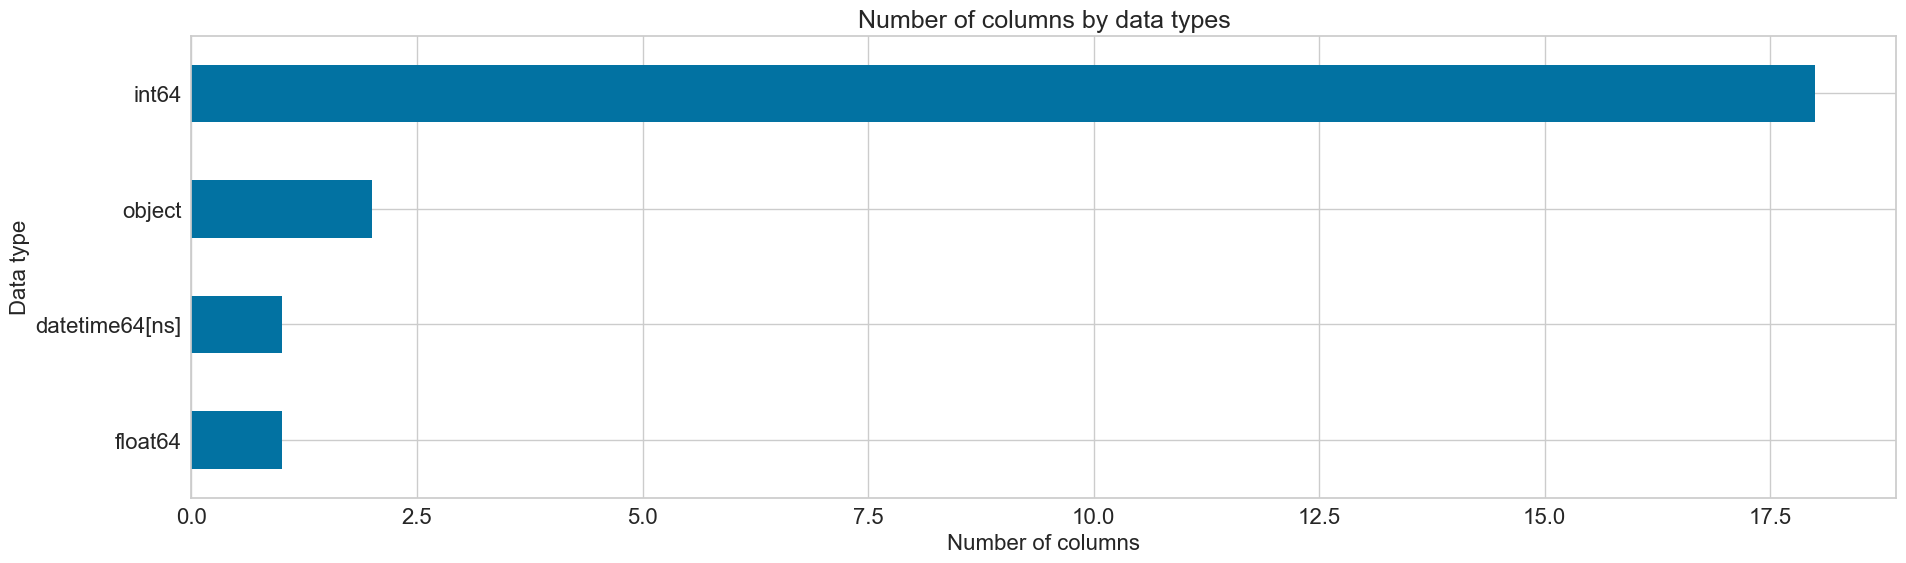

In [468]:
# Number of each type of column
data.dtypes.value_counts().sort_values().plot(kind="barh", figsize=(22, 6), fontsize=16)

plt.title("Number of columns by data types", fontsize=18)
plt.xlabel("Number of columns", fontsize=16)
plt.ylabel("Data type", fontsize=16)

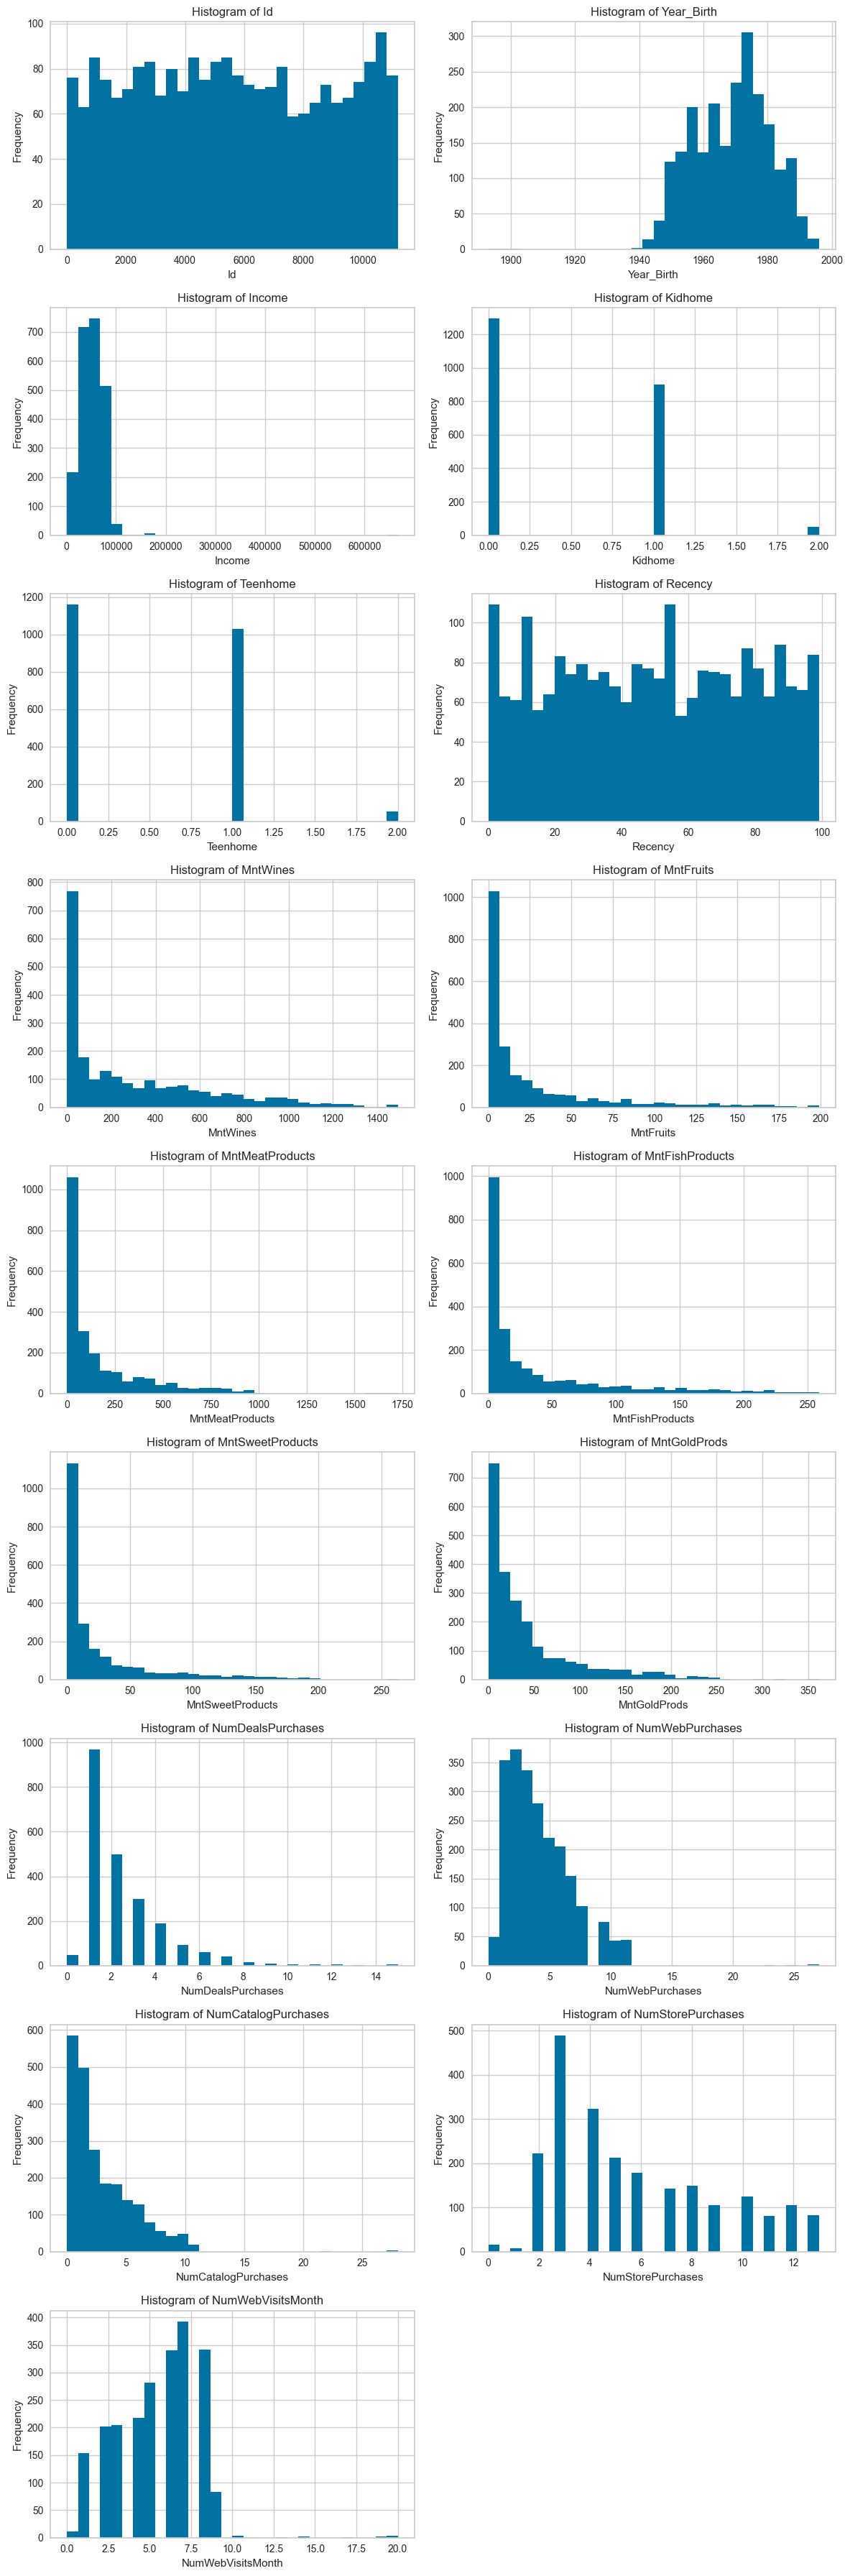

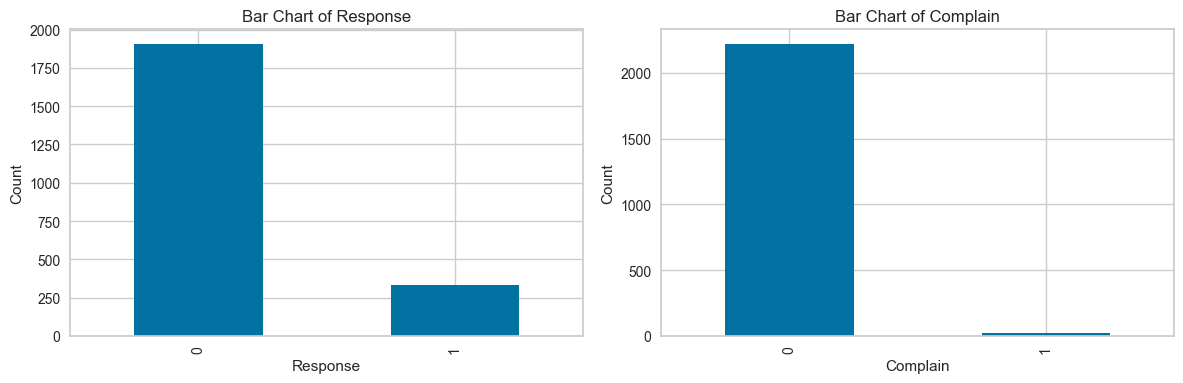

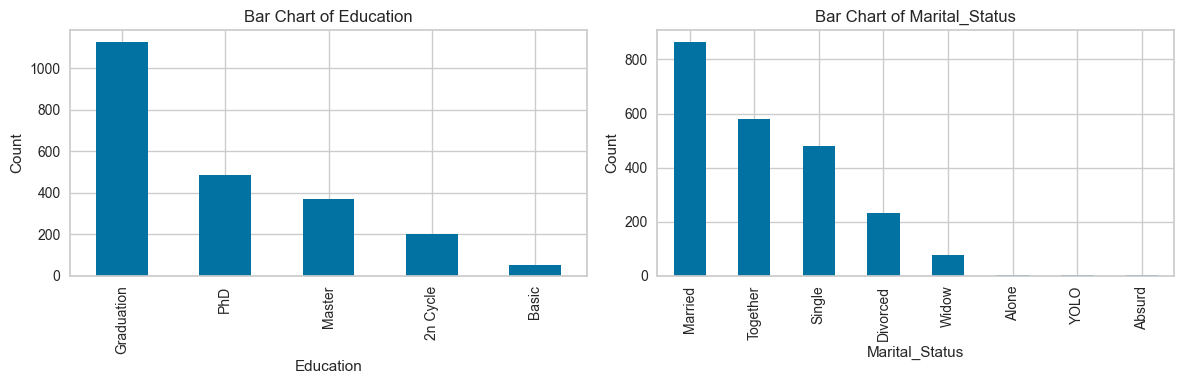

In [469]:
# Plot histograms for numeric columns
num_plots = len(numeric_cols)          # total number of numeric columns
rows = math.ceil(num_plots / 2)        # how many rows of subplots we need
fig, axes = plt.subplots(rows, 2, figsize=(12, 4*rows))  # create a grid of subplots
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(data[col].dropna(), bins=30)
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# If there's an odd number of columns, turn off the unused subplot(s)
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

# Plot bar charts for binary columns
bin_plots = len(binary_cols)
rows = math.ceil(bin_plots / 2)
fig, axes = plt.subplots(rows, 2, figsize=(12, 4*rows))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Bar Chart of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

# Plot bar charts for categorical columns
cat_plots = len(categorical_cols)
rows = math.ceil(cat_plots / 2)
fig, axes = plt.subplots(rows, 2, figsize=(12, 4*rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Bar Chart of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

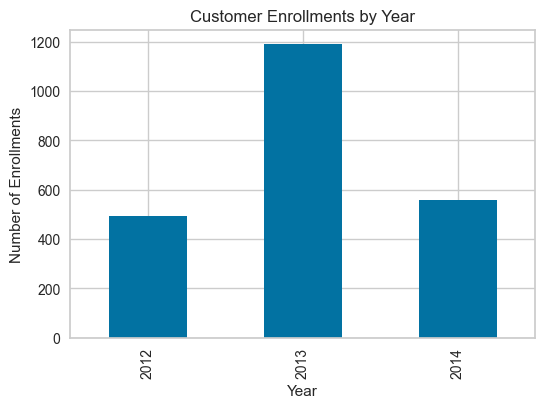

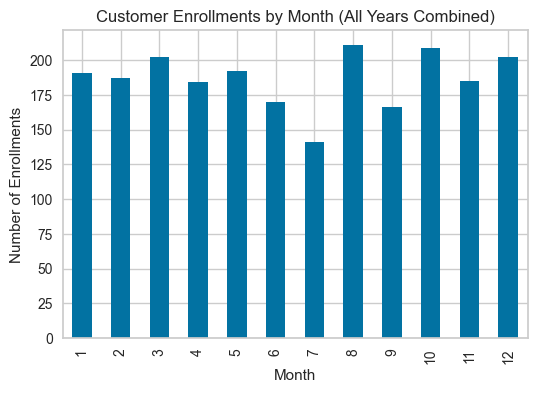

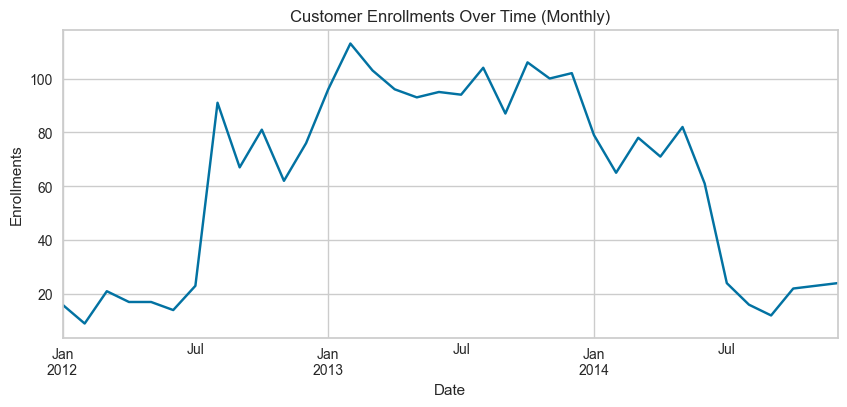

In [470]:
# Count enrollments by year
enrollments_per_year = data['Dt_Customer'].dt.year.value_counts().sort_index()

plt.figure(figsize=(6,4))
enrollments_per_year.plot(kind='bar')
plt.title('Customer Enrollments by Year')
plt.xlabel('Year')
plt.ylabel('Number of Enrollments')
plt.show()

# Count enrollments by month
enrollments_per_month = data['Dt_Customer'].dt.month.value_counts().sort_index()

plt.figure(figsize=(6,4))
enrollments_per_month.plot(kind='bar')
plt.title('Customer Enrollments by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.show()


# Resample by month and count how many enrollments occurred each month
data.set_index('Dt_Customer', inplace=True)  # Temporarily make Dt_Customer the index
enrollments_ts = data.resample('M').size()   # Count rows per month

plt.figure(figsize=(10,4))
enrollments_ts.plot()
plt.title('Customer Enrollments Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Enrollments')
plt.show()

data.reset_index(inplace=True)

data.reset_index(inplace=True)


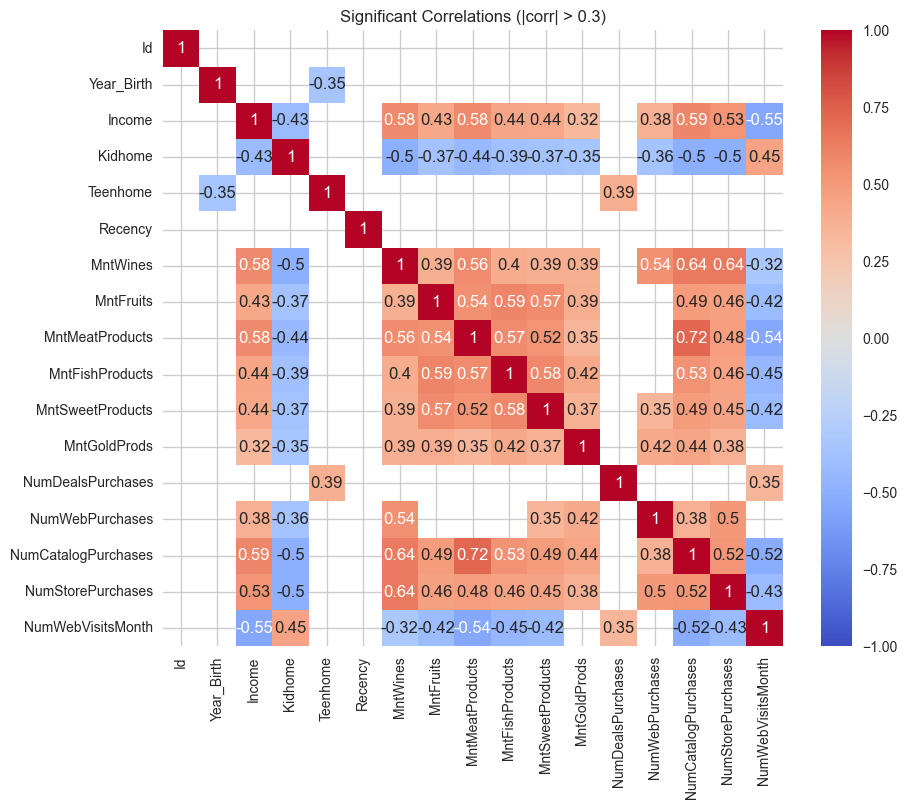

In [471]:
# Correlation heatmap
numeric_data = data[numeric_cols]

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Create a boolean mask where values within [-0.3, 0.3] are True
mask = corr_matrix.abs() < 0.3

# Plot heatmap using the mask
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Significant Correlations (|corr| > 0.3)")
plt.show()

In [472]:
# Correlations with the target
numeric_data_with_response = data[numeric_cols + ['Response']]

corr = numeric_data_with_response.corr()["Response"].sort_values()

# Display correlations
print("Top 10 - Positive Correlations:")
print("-----------------------------------")
print(corr.tail(10))
print("\nTop 10 - Negative Correlations:")
print("------------------------------")
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntFruits              0.125289
Income                 0.132867
MntGoldProds           0.139850
NumWebPurchases        0.148730
NumCatalogPurchases    0.220810
MntMeatProducts        0.236335
MntWines               0.247254
Response               1.000000
Name: Response, dtype: float64

Top 10 - Negative Correlations:
------------------------------
Recency             -0.198437
Teenhome            -0.154446
Kidhome             -0.080008
Id                  -0.021968
NumWebVisitsMonth   -0.003987
NumDealsPurchases    0.002238
Year_Birth           0.021325
NumStorePurchases    0.039363
MntFishProducts      0.111331
MntSweetProducts     0.117372
Name: Response, dtype: float64


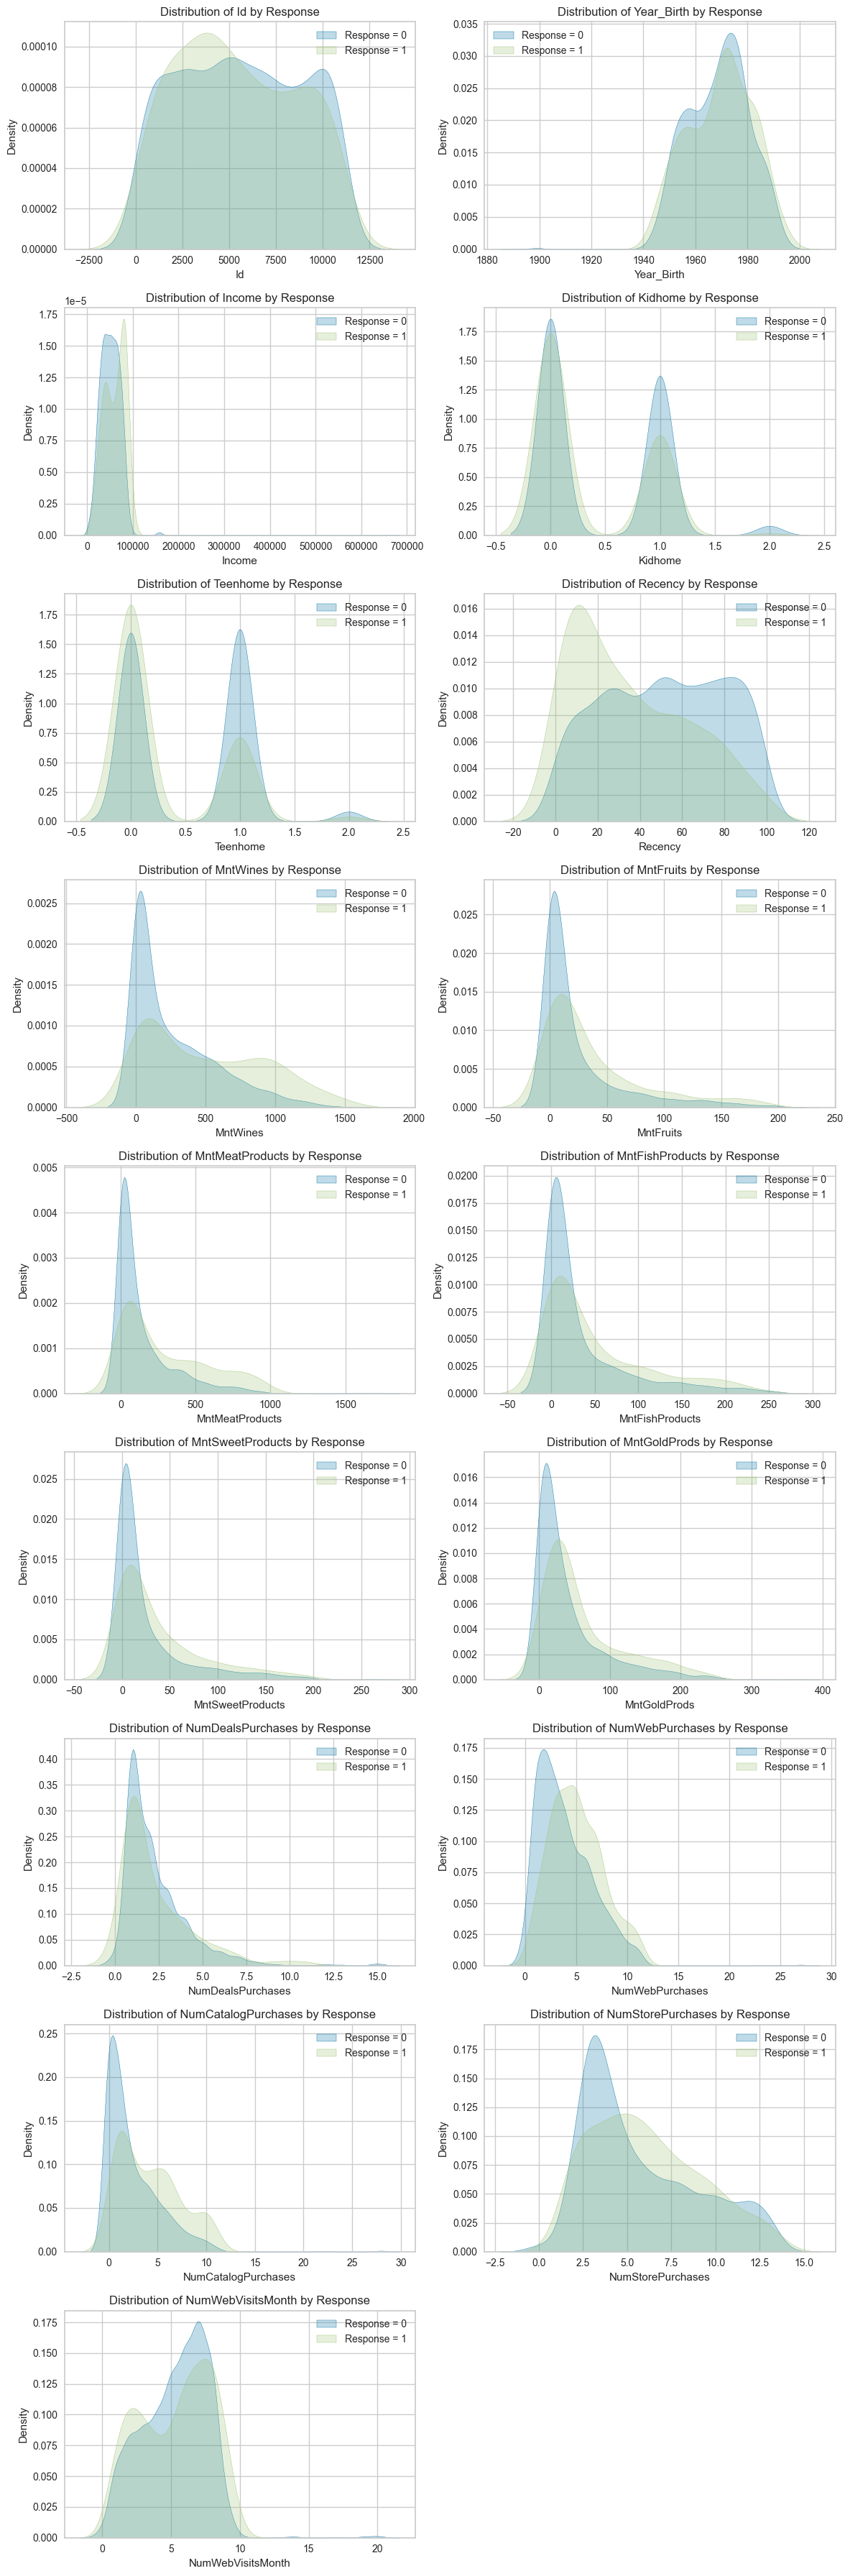

In [473]:
num_plots = len(numeric_cols)          # Total number of numeric columns
rows = math.ceil(num_plots / 2)        # Number of rows needed
fig, axes = plt.subplots(rows, 2, figsize=(12, 4*rows))  # Create a grid of subplots
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(data=data[data['Response'] == 0][col], label="Response = 0", fill=True, ax=axes[i])
    sns.kdeplot(data=data[data['Response'] == 1][col], label="Response = 1", fill=True, ax=axes[i])

    axes[i].set_title(f'Distribution of {col} by Response')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")
    axes[i].legend()

# If there's an odd number of columns, turn off the unused subplot(s)
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

#### **Feature transformation and creation functions**

In [474]:
############Skewness coeficcient and Log Transformation###############
def identify_and_transform_skewed_features(data, threshold=1.0):
    """
    Identifies skewed numerical features and applies log transformation to them.
    
    Parameters:
        data (pd.DataFrame): Input dataframe
        threshold (float): Skewness threshold above which to apply transformation
    
    Returns:
        pd.DataFrame: Dataframe with transformed features
        list: List of transformed feature names
    """
    # Copy the dataframe to avoid modifying the original
    df_transformed = data.copy()

    # Get only numeric columns (exclude binary)
    numeric_cols = [col for col in data.select_dtypes(include=['number']).columns
                   if len(data[col].unique()) > 2]  # Exclude binary columns

    # Calculate skewness for each numeric column
    skewness = data[numeric_cols].skew()

    # Identify highly skewed features (above threshold)
    highly_skewed = skewness[skewness.abs() > threshold].index.tolist()

    print(f"Features with skewness > {threshold}:")
    for col in highly_skewed:
        print(f"{col}: {skewness[col]:.2f}")

    # Apply log transformation to highly skewed features
    transformed_features = []
    for feature in highly_skewed:
        # Add small constant to handle zeros
        if (data[feature] >= 0).all():  # Only transform if all values are non-negative
            # For positive skew, use log1p transformation
            if skewness[feature] > 0:
                df_transformed[feature] = np.log1p(df_transformed[feature])
                transformed_features.append(feature)
                print(f"Applied log1p transformation to {feature}")
            # For negative skew, use different approach if needed
            else:
                # Can implement different transformations for negative skew if needed
                pass

    # Check skewness after transformation
    if transformed_features:
        print("\nSkewness after transformation:")
        for feature in transformed_features:
            print(f"{feature}: {df_transformed[feature].skew():.2f}")

    return df_transformed, transformed_features

In [475]:
##############K-means Clustering for Customer Segmentation###########
def implement_kmeans_segmentation(data, n_clusters=4, random_state=42):
    """
    Implements K-means clustering on customer data and adds cluster labels.
    
    Parameters:
        data (pd.DataFrame): Input dataframe
        n_clusters (int): Number of clusters for K-means
        random_state (int): Random seed for reproducibility
    
    Returns:
        pd.DataFrame: Dataframe with added cluster labels
        KMeans: Fitted K-means model
    """
    # Select relevant features for clustering
    cluster_features = [
        'income', 'kidhome', 'teenhome', 'recency',
        'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
        'mntsweetproducts', 'mntgoldprods',
        'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth'
    ]

    # Make sure all features exist in the dataframe
    valid_features = [col for col in cluster_features if col in data.columns]

    # Extract clustering data
    clustering_data = data[valid_features].copy()

    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clustering_data)

    # Determine optimal number of clusters using Elbow Method
    distortions = []
    K_range = range(2, 11)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)

    # Plot Elbow Method
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, distortions, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    # Train final K-means model with specified number of clusters
    final_kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    clusters = final_kmeans.fit_predict(scaled_data)

    # Add cluster labels to the original dataframe
    data_with_clusters = data.copy()
    data_with_clusters['customer_segment'] = clusters

    # Analyze clusters
    cluster_analysis = data_with_clusters.groupby('customer_segment').agg({
        'income': 'mean',
        'kidhome': 'mean',
        'teenhome': 'mean',
        'mntwines': 'mean',
        'mntmeatproducts': 'mean',
        'numwebpurchases': 'mean',
        'response': ['mean', 'count']
    })

    print("Cluster Analysis:")
    print(cluster_analysis)

    # PCA Visualization
    from sklearn.decomposition import PCA

    # Apply PCA to reduce to 2 dimensions for visualization
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_data)

    # Create DataFrame with principal components and cluster labels
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = clusters

    # Plot the PCA results
    plt.figure(figsize=(10, 8))

    # Create a scatter plot with different colors for each cluster
    for cluster_num in range(n_clusters):
        cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
        plt.scatter(
            cluster_data['PC1'],
            cluster_data['PC2'],
            label=f'Cluster {cluster_num}',
            alpha=0.7,
            s=50
        )

    # Add cluster centers
    centers_pca = pca.transform(final_kmeans.cluster_centers_)
    plt.scatter(
        centers_pca[:, 0],
        centers_pca[:, 1],
        s=200,
        marker='X',
        c='red',
        label='Centroids'
    )

    # Add labels and legend
    plt.title('Customer Segments - PCA Visualization', size=15)
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return data_with_clusters, final_kmeans

In [476]:
##############Semi-Supervised Clustering for Customer Segmentation###########
def implement_semi_supervised_clustering(data, n_clusters=6, confidence_percentile=20, random_state=29):
    """
    Implements semi-supervised clustering on customer data and adds both cluster labels
    and high confidence flags. Since we do not have previosly labeled data we based this
    on the previously created cluster and the most representative istance act as a label
    
    Parameters:
        data (pd.DataFrame): Input dataframe
        n_clusters (int): Number of clusters for K-means
        confidence_percentile (int): Percentile threshold for high confidence assignments (0-100)
        random_state (int): Random seed for reproducibility
    
    Returns:
        pd.DataFrame: Dataframe with added cluster labels and confidence flags
        dict: Dictionary with clustering artifacts (model, thresholds, etc.)
    """
    # Select relevant features for clustering - using the same features as in the original clustering
    cluster_features = [
        'income', 'kidhome', 'teenhome', 'recency',
        'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
        'mntsweetproducts', 'mntgoldprods',
        'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth'
    ]

    # Make sure all features exist in the dataframe
    valid_features = [col for col in cluster_features if col in data.columns]

    # Extract clustering data
    clustering_data = data[valid_features].copy()

    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clustering_data)

    # Train K-means model with specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    clusters = kmeans.fit_predict(scaled_data)

    # Calculate distances to assigned centroids
    distances = np.zeros(len(data))
    for i in range(len(data)):
        cluster_idx = clusters[i]
        centroid = kmeans.cluster_centers_[cluster_idx]
        # Euclidean distance from the point to its assigned centroid
        distances[i] = np.sqrt(np.sum((scaled_data[i] - centroid) ** 2))

    # Add cluster labels and distances to the original dataframe
    data_with_clusters = data.copy()
    data_with_clusters['customer_segment'] = clusters
    data_with_clusters['distance_to_centroid'] = distances

    # Find representative instances (closest to centroids) for each cluster
    representative_indices = []
    for i in range(n_clusters):
        # Get all points in this cluster
        cluster_mask = clusters == i
        if np.any(cluster_mask):
            # Find the point closest to the centroid
            cluster_distances = distances[cluster_mask]
            closest_idx = np.argmin(cluster_distances)
            # Get the original index
            representative_idx = np.where(cluster_mask)[0][closest_idx]
            representative_indices.append(representative_idx)

    # Add representative flag
    data_with_clusters['is_representative'] = False
    data_with_clusters.loc[representative_indices, 'is_representative'] = True

    # Semi-supervised approach: Calculate confidence thresholds for each cluster
    confidence_thresholds = []
    for i in range(n_clusters):
        cluster_mask = clusters == i
        if np.any(cluster_mask):
            cluster_distances = distances[cluster_mask]
            # Sort distances and find the threshold for the given percentile
            sorted_distances = np.sort(cluster_distances)
            threshold_idx = int(len(sorted_distances) * (confidence_percentile / 100))
            # Use the distance at the threshold index as the cutoff
            confidence_thresholds.append(sorted_distances[threshold_idx])
        else:
            confidence_thresholds.append(np.inf)

    # Add high confidence flag based on thresholds
    high_confidence = np.zeros(len(data), dtype=bool)
    for i in range(n_clusters):
        cluster_mask = clusters == i
        high_confidence[cluster_mask] = distances[cluster_mask] <= confidence_thresholds[i]

    data_with_clusters['high_confidence_segment'] = high_confidence

    data_with_clusters['high_confidence_segment_int'] = data_with_clusters['high_confidence_segment'].astype(int)

    # Calculate cluster statistics
    cluster_stats = []
    for i in range(n_clusters):
        cluster_mask = clusters == i
        confidence_mask = high_confidence & cluster_mask

        # Calculate size and response rates
        cluster_size = np.sum(cluster_mask)
        confidence_size = np.sum(confidence_mask)

        if cluster_size > 0:
            # Response rate for all points in cluster
            cluster_response_rate = np.mean(data['response'].values[cluster_mask]) * 100

            # Response rate for high confidence points
            if confidence_size > 0:
                confidence_response_rate = np.mean(data['response'].values[confidence_mask]) * 100
            else:
                confidence_response_rate = 0

            cluster_stats.append({
                'cluster': i,
                'size': cluster_size,
                'high_confidence_size': confidence_size,
                'response_rate': cluster_response_rate,
                'high_confidence_response_rate': confidence_response_rate
            })

    # Print cluster statistics
    print("\nSemi-supervised Clustering Statistics:")
    for stat in cluster_stats:
        print(f"Cluster {stat['cluster']}: {stat['size']} customers, {stat['high_confidence_size']} high confidence")
        print(f"  Response Rate: {stat['response_rate']:.2f}%, High Confidence Response Rate: {stat['high_confidence_response_rate']:.2f}%")

    # Return the enriched dataframe and clustering artifacts
    clustering_artifacts = {
        'kmeans_model': kmeans,
        'scaler': scaler,
        'confidence_thresholds': confidence_thresholds,
        'features': valid_features,
        'representative_indices': representative_indices,
        'cluster_stats': cluster_stats
    }

    return data_with_clusters, clustering_artifacts

#### **Unique values for the categorical data**

In [477]:
Unique_education = data["Education"].value_counts()
Unique_marital = data["Marital_Status"].value_counts()
print(Unique_education)
print(Unique_marital)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


#### **Data cleanup**

In [478]:
# Drop the features that are not useful
data.drop(
    ["Id"], axis=1, inplace=True
)

In [479]:
# Clean column names
def clean_col(name: str) -> str:
    """
    Clean the column name by removing spaces and converting to lowercase.
    """

    return name.strip().lower().replace(" ", "_")

In [480]:
for col in data.columns:
    data.rename(columns={col: clean_col(col)}, inplace=True)

#### **Feature engineering** ####

In [481]:
# Total Spending - Sum of all purchase amounts across categories
# Customers with higher total spending may be more engaged and likely to respond to offers
data['total_spend'] = data['mntwines'] + data['mntfruits'] + data['mntmeatproducts'] + \
                      data['mntfishproducts'] + data['mntsweetproducts'] + data['mntgoldprods']

# Spending Proportions - Calculate percentage of spending in each category
# Distribution of spending across categories may reveal preferences that correlate with offer acceptance
# Avoid division by zero
spend_cols = ['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']
for col in spend_cols:
    data[f'{col}_ratio'] = data[col] / (data['total_spend'] + 0.1)

# Premium Product Affinity
# Preference for premium items may indicate receptiveness to special offers
data['premium_ratio'] = (data['mntwines'] + data['mntgoldprods']) / (data['total_spend'] + 0.1)

# Age Features
# Different age groups may respond differently to marketing offers
current_year = 2025  # Current year as reference
data['age'] = current_year - data['year_birth']

# Age Group
# Age groups may have distinct spending and response patterns
bins = [0, 35, 50, 65, 100, float('inf')]
labels = ['<35', '35-50', '51-65', '66-100', '>100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Has Children - Binary flag indicating presence of children
# Families with children have different purchasing needs
data['has_children'] = ((data['kidhome'] + data['teenhome']) > 0).astype(int)

# Total Children - Sum of kids and teens
# Total number of dependents impacts household spending
data['total_children'] = data['kidhome'] + data['teenhome']

# Family Size - Include adults based on marital status
# Total household size affects disposable income and purchasing decisions
data['family_size'] = data['total_children'] + np.where(
    data['marital_status'].isin(['Married', 'Together']), 2, 1
)

# Income per Family Member
# Disposable income per person better represents economic capacity than raw income
data['income_per_family_member'] = data['income'] / data['family_size']

# Recency Score - Transform recency using exponential decay
# Recent interactions have exponentially higher value for prediction
data['recency_score'] = np.exp(-data['recency'] / 30)

# Is Active - Binary flag for customers active in last 30 days
# Recently active customers are prime targets for offers
data['is_active'] = (data['recency'] < 30).astype(int)

# Purchase by channel
purchase_channels = ['numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']

# Preferred Channel - Identify dominant purchase channel
# Customers prefer specific channels, which affects response likelihood
def get_preferred_channel(row):
    channels = ['web', 'catalog', 'store']
    values = [row['numwebpurchases'], row['numcatalogpurchases'], row['numstorepurchases']]
    return channels[np.argmax(values)]

data['preferred_channel'] = data[purchase_channels].apply(get_preferred_channel, axis=1)

# Channel Diversity - Number of channels used
# Customers using multiple channels may be more responsive to diverse marketing approaches
data['channel_diversity'] = data[purchase_channels].apply(
    lambda x: sum(x > 0), axis=1
)

# Web Engagement Ratio
# High browse-to-buy ratio may indicate research without conversion
data['webvisit_to_order_ratio'] = data['numwebvisitsmonth'] / (data['numwebpurchases'] + 1)

# Customer Tenure - Calculate days since becoming customer
# Longer tenure indicates loyalty and affects response patterns
data['day'] = pd.to_datetime(data['dt_customer']).dt.day
data['month'] = pd.to_datetime(data['dt_customer']).dt.month
data['year'] = pd.to_datetime(data['dt_customer']).dt.year

# Calculate tenure in days (using a reference date of March 2, 2025)
reference_date = pd.to_datetime('2025-03-02')
data['customer_date'] = pd.to_datetime(
    dict(year=data['year'], month=data['month'], day=data['day'])
)
data['customer_tenure_days'] = (reference_date - data['customer_date']).dt.days
data['customer_tenure_years'] = data['customer_tenure_days'] / 365.25

# Income × Age Interaction
# Captures joint effect of two important predictors
data['income_age_interaction'] = data['income'] * data['age']

# Spend × Recency Interaction
# High spenders who purchased recently may be especially responsive
data['spend_recency_interaction'] = data['total_spend'] * data['recency_score']

# High-Value Customer - Top 25% by spending
# Top customers may respond differently to offers
spend_threshold = data['total_spend'].quantile(0.75)
data['is_high_value'] = (data['total_spend'] > spend_threshold).astype(int)

# Customer Lifetime Value (CLV) - Spend per unit time
# Rate of value generation indicates future potential value
data['clv'] = data['total_spend'] / (data['customer_tenure_years'] + 0.1)

# Create age buckets for one-hot encoding
data = pd.get_dummies(data, columns=['age_group', 'preferred_channel'], drop_first=False)

# Clean up temporary columns we no longer need
data.drop(['customer_date', 'day', 'month'], axis=1, inplace=True)

Identifying and transforming skewed features
Features with skewness > 1.0:
income: 6.80
mntwines: 1.18
mntfruits: 2.10
mntmeatproducts: 2.08
mntfishproducts: 1.92
mntsweetproducts: 2.14
mntgoldprods: 1.89
numdealspurchases: 2.42
numwebpurchases: 1.38
numcatalogpurchases: 1.88
mntfruits_ratio: 1.90
mntfishproducts_ratio: 1.96
mntsweetproducts_ratio: 3.30
mntgoldprods_ratio: 1.42
income_per_family_member: 2.16
recency_score: 1.08
channel_diversity: -1.63
webvisit_to_order_ratio: 4.77
income_age_interaction: 3.23
spend_recency_interaction: 2.62
Applied log1p transformation to income
Applied log1p transformation to mntwines
Applied log1p transformation to mntfruits
Applied log1p transformation to mntmeatproducts
Applied log1p transformation to mntfishproducts
Applied log1p transformation to mntsweetproducts
Applied log1p transformation to mntgoldprods
Applied log1p transformation to numdealspurchases
Applied log1p transformation to numwebpurchases
Applied log1p transformation to numcatalog

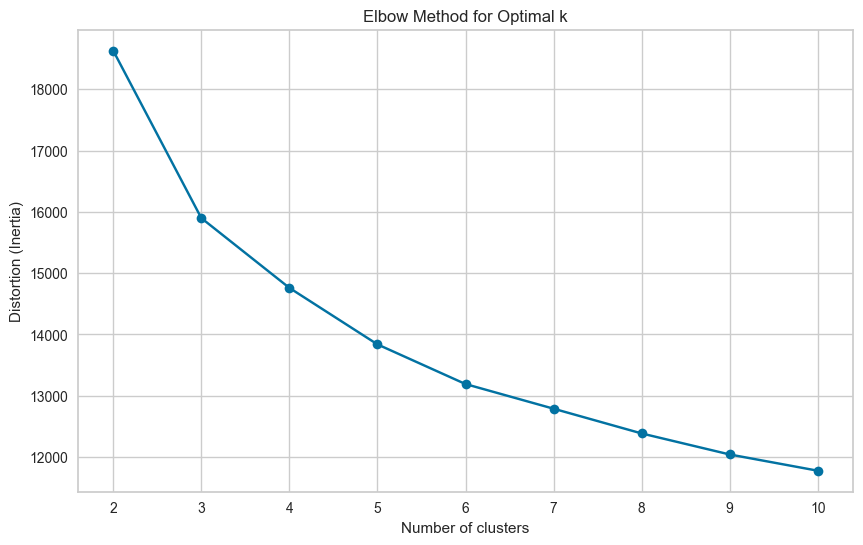

Cluster Analysis:
                     income   kidhome  teenhome  mntwines mntmeatproducts  \
                       mean      mean      mean      mean            mean   
customer_segment                                                            
0                 10.601505  0.830904  0.976676  3.276426        2.400765   
1                 11.073670  0.095890  1.013699  6.100686        5.230149   
2                 10.068545  0.826754  0.048246  2.162674        2.467541   
3                 11.218980  0.035785  0.005964  6.221736        5.971650   
4                 10.687373  0.888889  0.376344  4.655256        4.213048   
5                 10.872171  0.108844  1.017007  5.793938        4.105459   

                 numwebpurchases  response        
                            mean      mean count  
customer_segment                                  
0                       0.885228  0.029155   343  
1                       1.941292  0.082192   365  
2                       0.931796 

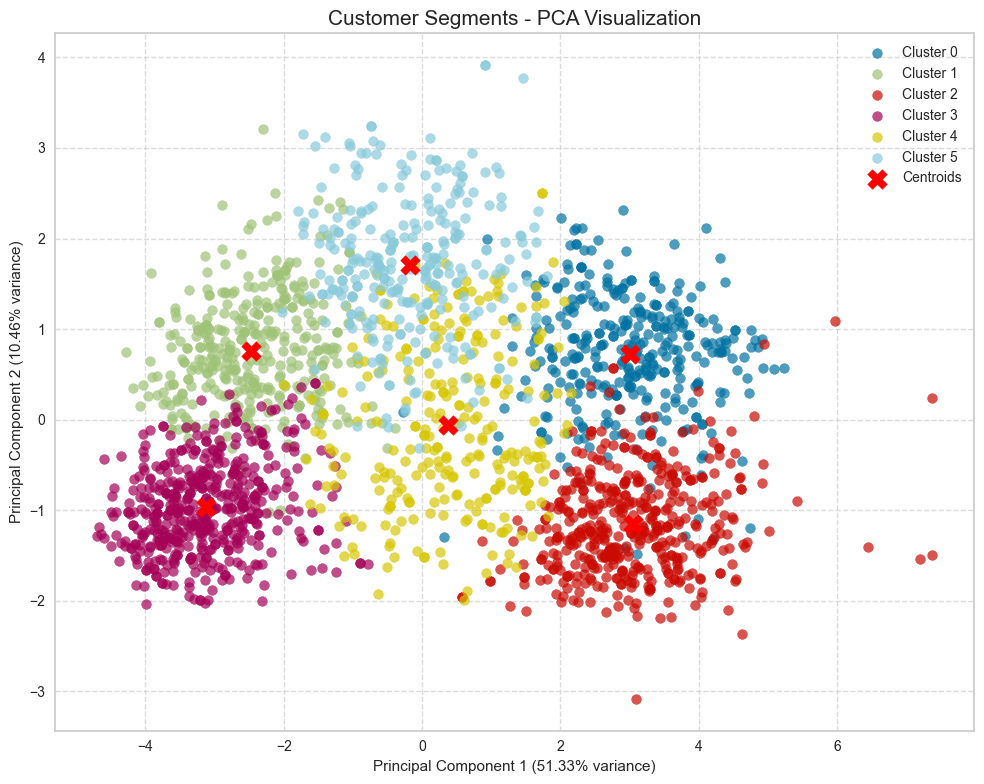

In [482]:
print("Identifying and transforming skewed features")
data, transformed_features = identify_and_transform_skewed_features(data, threshold=1.0)

print("Implementing K-means clustering for customer segmentation")
data, kmeans_model = implement_kmeans_segmentation(data, n_clusters=6, random_state=42)


#### **Semi supervised clustering** ####


Semi-supervised Clustering Statistics:
Cluster 0: 343 customers, 70 high confidence
  Response Rate: 2.92%, High Confidence Response Rate: 2.86%
Cluster 1: 365 customers, 74 high confidence
  Response Rate: 8.22%, High Confidence Response Rate: 4.05%
Cluster 2: 456 customers, 92 high confidence
  Response Rate: 11.40%, High Confidence Response Rate: 7.61%
Cluster 3: 503 customers, 101 high confidence
  Response Rate: 30.62%, High Confidence Response Rate: 19.80%
Cluster 4: 279 customers, 56 high confidence
  Response Rate: 17.56%, High Confidence Response Rate: 23.21%
Cluster 5: 294 customers, 59 high confidence
  Response Rate: 13.27%, High Confidence Response Rate: 8.47%

High confidence segment assignments: 452 customers (20.18%)


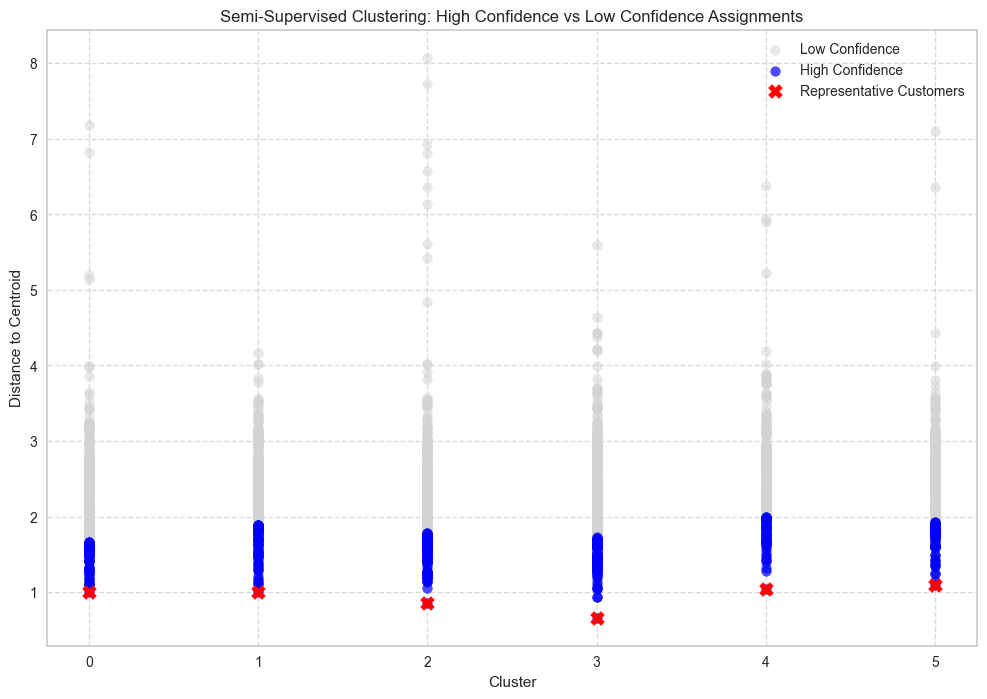

Overall response rate: 14.91%
High confidence segments response rate: 11.06%


In [483]:
data, clustering_artifacts = implement_semi_supervised_clustering(
    data,
    n_clusters=6,
    confidence_percentile=20,  # Top 20% closest to centroids
    random_state=42
)

# Print summary of high confidence segments
high_confidence_count = data['high_confidence_segment'].sum()
high_confidence_pct = (high_confidence_count / len(data)) * 100
print(f"\nHigh confidence segment assignments: {high_confidence_count} customers ({high_confidence_pct:.2f}%)")

# Optional: Visualize the high confidence segments
plt.figure(figsize=(12, 8))
plt.scatter(
    data[~data['high_confidence_segment']]['customer_segment'],
    data[~data['high_confidence_segment']]['distance_to_centroid'],
    c='lightgray', alpha=0.5, label='Low Confidence'
)
plt.scatter(
    data[data['high_confidence_segment']]['customer_segment'],
    data[data['high_confidence_segment']]['distance_to_centroid'],
    c='blue', alpha=0.7, label='High Confidence'
)
plt.scatter(
    data[data['is_representative']]['customer_segment'],
    data[data['is_representative']]['distance_to_centroid'],
    c='red', marker='X', s=100, label='Representative Customers'
)
plt.xlabel('Cluster')
plt.ylabel('Distance to Centroid')
plt.title('Semi-Supervised Clustering: High Confidence vs Low Confidence Assignments')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate response rates for high confidence segments
high_conf_response = data[data['high_confidence_segment']]['response'].mean() * 100
overall_response = data['response'].mean() * 100

print(f"Overall response rate: {overall_response:.2f}%")
print(f"High confidence segments response rate: {high_conf_response:.2f}%")


The scatter plot illustrates the distribution of customers across six clusters (0–5) as previously determined. Blue dots indicate high-confidence assignments (the 20% of customers closest to the cluster centroids), while gray dots represent the remaining 80% with lower confidence. Notably, the high-confidence segments exhibit a response rate of 11.06%, which is lower than the overall response rate of 14.91%. This suggests that customers with mixed characteristics—those situated near the boundaries between clusters—are actually more responsive to marketing campaigns than those with clearly defined purchasing patterns.

#### **Information leakage**

In [484]:
# We identify a possible data leakage in NumDealsPurchases since the data dictionary is not clear regarding
# if this purchases refeer to the the offer in the last campagn
data.drop( ["numdealspurchases"],axis=1,inplace=True,)
data.shape

(2240, 58)

#### **Data preparation**

In [485]:
# Create new columns for year and month directly from Dt_Customer
data['enrollments_year'] = data['dt_customer'].dt.year
data['enrollments_month'] = data['dt_customer'].dt.month
data.drop(['dt_customer'], axis=1, inplace=True)

#### **Categorical encodings**

In [486]:
# First we reclassify some of the labels in our categoricals to rebalance a bit more the data

# Education recategorization
education_mapping = {
    'PhD': 'Post Graduate',
    'Master': 'Post Graduate',
    '2n Cycle': 'Graduate',
    'Graduation': 'Graduate',
    'Basic': 'Pre Graduate'
}

# Apply education mapping
data['education'] = data['education'].map(education_mapping)

# Marital status recategorization
marital_mapping = {
    'Married': 'Married',
    'Together': 'Together',
    'Single': 'Single',
    'Divorced': 'Divorced',
    'Widow': 'Widow',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
}

# Apply marital status mapping
data['marital_status'] = data['marital_status'].map(marital_mapping)

# Verify the changes
print("\nNew Education Categories:")
print(data['education'].value_counts())

print("\nNew Marital Status Categories:")
print(data['marital_status'].value_counts())


New Education Categories:
education
Graduate         1330
Post Graduate     856
Pre Graduate       54
Name: count, dtype: int64

New Marital Status Categories:
marital_status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64


In [487]:
# We then can one hot encode
data = pd.get_dummies(data)
print(data.shape)
#data.to_excel("data_after.xlsx")


(2240, 65)


#### **Separate features and target**

In [488]:
y = data['response']  # Get target
X = data.drop('response', axis=1)  # Get all other columns as features

In [489]:
X_train, X_val_test, y_train, y_val_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=42
)

#### **Test-validation split**

In [490]:
X_val, X_test, y_val, y_test = model_selection.train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=42
)

In [491]:
print(f"Number of validation samples (X_val): {len(X_val)}")
print(f"Number of test samples (X_test): {len(X_test)}")
print(f"Number of validation labels (y_val): {len(y_val)}")
print(f"Number of test labels (y_test): {len(y_test)}")

Number of validation samples (X_val): 336
Number of test samples (X_test): 336
Number of validation labels (y_val): 336
Number of test labels (y_test): 336


#### **Standarize the data**

In [492]:
# Extract the 'customer_segment' column before scaling
customer_segment_train = X_train['customer_segment'].values
customer_segment_val = X_val['customer_segment'].values
customer_segment_test = X_test['customer_segment'].values

customer_segment_train = X_train['customer_segment'].values
customer_segment_val = X_val['customer_segment'].values
customer_segment_test = X_test['customer_segment'].values

high_confidence_train = X_train['high_confidence_segment'].values
high_confidence_val = X_val['high_confidence_segment'].values
high_confidence_test = X_test['high_confidence_segment'].values


# Identify binary/one-hot encoded columns (columns with only 0s and 1s)
one_hot_cols = []
non_one_hot_cols = []

for col in X_train.drop(columns=['customer_segment']).columns:
    # Check if column contains only 0s and 1s
    unique_vals = X_train[col].unique()
    if set(unique_vals).issubset({0, 1, 0.0, 1.0}):
        one_hot_cols.append(col)
    else:
        non_one_hot_cols.append(col)

print(f"One-hot encoded columns: {len(one_hot_cols)}")
print(f"Non-one-hot columns to standardize: {len(non_one_hot_cols)}")


One-hot encoded columns: 23
Non-one-hot columns to standardize: 40


In [493]:
# Create DataFrames for each type of column
X_train_to_scale = X_train[non_one_hot_cols].copy()
X_val_to_scale = X_val[non_one_hot_cols].copy()
X_test_to_scale = X_test[non_one_hot_cols].copy()

X_train_one_hot = X_train[one_hot_cols].copy()
X_val_one_hot = X_val[one_hot_cols].copy()
X_test_one_hot = X_test[one_hot_cols].copy()

# Scale only the non-one-hot columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_to_scale)
X_val_scaled = scaler.transform(X_val_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

# Convert scaled arrays back to DataFrames
train_scaled_df = pd.DataFrame(X_train_scaled, columns=non_one_hot_cols)
val_scaled_df = pd.DataFrame(X_val_scaled, columns=non_one_hot_cols)
test_scaled_df = pd.DataFrame(X_test_scaled, columns=non_one_hot_cols)

# Convert any boolean values to integers (0/1) in one-hot columns
X_train_one_hot = X_train_one_hot.astype(int)
X_val_one_hot = X_val_one_hot.astype(int)
X_test_one_hot = X_test_one_hot.astype(int)

# Combine the scaled columns with the one-hot encoded columns
train_df = pd.concat([train_scaled_df, X_train_one_hot.reset_index(drop=True)], axis=1)
val_df = pd.concat([val_scaled_df, X_val_one_hot.reset_index(drop=True)], axis=1)
test_df = pd.concat([test_scaled_df, X_test_one_hot.reset_index(drop=True)], axis=1)

# Add 'customer_segment' back to the DataFrames
train_df['customer_segment'] = customer_segment_train
val_df['customer_segment'] = customer_segment_val
test_df['customer_segment'] = customer_segment_test

# Add 'high_confidence_segment' back to the DataFrames (new)
train_df['high_confidence_segment'] = high_confidence_train
val_df['high_confidence_segment'] = high_confidence_val
test_df['high_confidence_segment'] = high_confidence_test

# Add the target column
train_df['target'] = y_train.reset_index(drop=True)
val_df['target'] = y_val.reset_index(drop=True)
test_df['target'] = y_test.reset_index(drop=True)

# Drop column that is not encoded
train_df = train_df.drop(columns=['high_confidence_segment'])
val_df = val_df.drop(columns=['high_confidence_segment'])
test_df = test_df.drop(columns=['high_confidence_segment'])


In [494]:
# Export to parque files
train_df.to_parquet("train.parquet")
val_df.to_parquet("val.parquet")
test_df.to_parquet("test.parquet")

#### **Base line model - Dummy Classifier**

In [495]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

In [496]:
# Accuracy
accuracy_dummy = dummy_clf.score(X_val, y_val)  # accuracy
# Precission
precision_dummy =precision_score(y_val, dummy_clf.predict(X_val))
print(accuracy_dummy)
print(precision_dummy)

0.8452380952380952
0.0


In [497]:
# Checking parquet columns
import pandas as pd

# Load the parquet files
train_df = pd.read_parquet("train.parquet")
val_df = pd.read_parquet("val.parquet")
test_df = pd.read_parquet("test.parquet")

pd.set_option('display.max_columns', None)

# Display the first few rows of each DataFrame
print("Train DataFrame:")
print(train_df.head())

print("\nValidation DataFrame:")
print(val_df.head())

print("\nTest DataFrame:")
print(test_df.head())

Train DataFrame:
      index  year_birth    income   kidhome  teenhome   recency  mntwines  \
0 -0.207463   -0.240787  1.275151 -0.816879 -0.932068 -0.189880  0.962929   
1  1.609546    0.009525  0.673146 -0.816879  0.883439  1.616874  0.653776   
2 -0.344361    1.678275  1.001970 -0.816879 -0.932068 -0.328861  1.087929   
3 -0.863951   -1.158600  0.657179 -0.816879  0.883439 -0.850041  0.980851   
4  1.166183   -0.240787 -0.131787  2.944841  0.883439  1.165186 -0.952175   

   mntfruits  mntmeatproducts  mntfishproducts  mntsweetproducts  \
0   0.642506         1.762901         1.641165          1.897860   
1   0.434425        -0.137033         0.387710          0.243415   
2   0.955858         1.314018        -1.500037          0.918345   
3  -1.396400         0.098573        -1.500037         -0.108094   
4  -0.957345        -0.388174        -0.344177         -0.543477   

   mntgoldprods  numwebpurchases  numcatalogpurchases  numstorepurchases  \
0      0.826431         1.061872   